## Training and Running a linear model using Scikit-learn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

**Load the data**

In [18]:
oecd_bli=pd.read_csv("oecd_bli_2015.csv",thousands=',')

In [19]:
gdp_per_capita=pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',
                          encoding='latin1',na_values="n/a")

**Prepare the data**

In [20]:
#This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [21]:
country_stats=prepare_country_stats(oecd_bli,gdp_per_capita)

In [22]:
X=np.c_[country_stats["GDP per capita"]]

In [23]:
y=np.c_[country_stats['Life satisfaction']]

**Visualize the data**

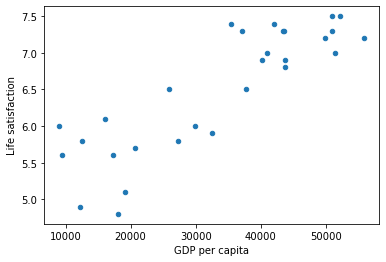

In [27]:
country_stats.plot(kind="scatter",x="GDP per capita",y='Life satisfaction')
plt.show()

**Select a linear model**

In [28]:
model=sklearn.linear_model.LinearRegression()

**Train the model**

In [29]:
model.fit(X,y)

LinearRegression()

**Make a prediction for Cyprus**

In [30]:
X_new=[[22587]]#Cyprus's GDP per capita
print(model.predict(X_new))

[[5.96242338]]


**Using k-Nearest Neighnors regression**

In [32]:
import sklearn.neighbors

In [33]:
model=sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [34]:
model.fit(X,y)

KNeighborsRegressor(n_neighbors=3)

In [35]:
print(model.predict(X_new))

[[5.76666667]]
